# Some discrete dynamics


## Using Newton's method to solve systems of equations

* Let's do an analysis of Newton's method to see how robust a method of solution it is, for systems of non-linear equations. 

* Begin with the system

$$ x^2 + y^2 = 4, \hskip 1cm xy = 1 $$

We can of course use Sympy to solve this system.

In [44]:
import sympy as sp
import numpy as np
import math as ma
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib nbagg

expaths = ["/usr/lib/python3/dist-packages", "/usr/local/lib/python3.5/dist-packages"]
for xp in expaths:
    if (xp not in sys.path):
        sys.path.append(xp)
import tqdm

In [2]:
x,y = sp.symbols("x y", real=True)
sol = sp.solve([x**2 + y**2 - 4, x*y-1 ])
sp.pprint(sol)

⎡⎧   ⎛       _________⎞   _________ ⎛    _________    ⎞        _________⎫  ⎧  
⎢⎨x: ⎝-2 - ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝- ╲╱ -√3 + 2  + 2⎠, y: -╲╱ -√3 + 2 ⎬, ⎨x:
⎣⎩                                                                      ⎭  ⎩  

  ⎛       _________⎞   _________ ⎛  _________    ⎞       _________⎫  ⎧   ⎛    
 -⎝-2 + ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝╲╱ -√3 + 2  + 2⎠, y: ╲╱ -√3 + 2 ⎬, ⎨x: ⎝-2 -
                                                                  ⎭  ⎩        

   ________⎞   ________ ⎛    ________    ⎞        ________⎫  ⎧    ⎛       ____
 ╲╱ √3 + 2 ⎠⋅╲╱ √3 + 2 ⋅⎝- ╲╱ √3 + 2  + 2⎠, y: -╲╱ √3 + 2 ⎬, ⎨x: -⎝-2 + ╲╱ √3 
                                                          ⎭  ⎩                

____⎞   ________ ⎛  ________    ⎞       ________⎫⎤
+ 2 ⎠⋅╲╱ √3 + 2 ⋅⎝╲╱ √3 + 2  + 2⎠, y: ╲╱ √3 + 2 ⎬⎥
                                                ⎭⎦


In [3]:
solf = []
for S in sol:
    print('x == ', S[x].evalf(), ' ', end='')
    print('y == ', S[y].evalf(), ' ')
    solf.append( (S[x].evalf(), S[y].evalf()) )
solf = np.array(solf)

x ==  -1.93185165257814  y ==  -0.517638090205041  
x ==  1.93185165257814  y ==  0.517638090205041  
x ==  -0.517638090205041  y ==  -1.93185165257814  
x ==  0.517638090205041  y ==  1.93185165257814  


### Let's set up Newton's method to find the root. 

Let's write some code that takes a point $(x,y) \in \mathbb R^2$ in the plane as an initial condition for
Newton's method.  We will iterate Newton's method and color the point $(x,y)$ a color corresponding to the (approximate) root the method discovers. 

$$f \pmatrix{x \cr y} = \pmatrix{ x^2 + y^2 - 4 \cr xy - 1 }$$

$$Df = \pmatrix{ 2x & 2y \cr y & x }$$

Newton's method involves replacing the approximate root $\pmatrix{x_0 \cr y_0}$ with the solution to the linearized equation

$$f \pmatrix{x_0 \cr y_0} + Df_{\pmatrix{x_0 \cr y_0}} \left( \pmatrix{x_1 \cr y_1} - \pmatrix{x_0 \cr y_0} \right) = 0$$

i.e. 

$$\pmatrix{x_0 \cr y_0} \longmapsto \pmatrix{x_1 \cr y_1}$$ 

with 

$$\pmatrix{x_1 \cr y_1} = \pmatrix{x_0 \cr y_0} - Df^{-1}_{\pmatrix{x_0 \cr y_0}} \left( f \pmatrix{x_0 \cr y_0} \right)$$

Let's work it out in Sympy.

In [8]:
f = sp.Matrix([x**2+y**2 -4, x*y-1])
sp.pprint(f)

fx = sp.diff(f, x)
fy = sp.diff(f, y)
Df = sp.Matrix([[fx[0,0], fy[0,0]], [fx[1,0], fy[1,0]]] )
sp.pprint(Df)

nit = sp.Matrix([x, y]) - (Df**(-1))*f
nit = sp.simplify(nit)
sp.pprint(nit)

⎡ 2    2    ⎤
⎢x  + y  - 4⎥
⎢           ⎥
⎣  x⋅y - 1  ⎦
⎡2⋅x  2⋅y⎤
⎢        ⎥
⎣ y    x ⎦
⎡ 3      2          ⎤
⎢x    x⋅y           ⎥
⎢── - ──── + 2⋅x - y⎥
⎢2     2            ⎥
⎢───────────────────⎥
⎢       2    2      ⎥
⎢      x  - y       ⎥
⎢                   ⎥
⎢ 2          3      ⎥
⎢x ⋅y       y       ⎥
⎢──── + x - ── - 2⋅y⎥
⎢ 2         2       ⎥
⎢───────────────────⎥
⎢       2    2      ⎥
⎣      x  - y       ⎦


In [17]:
## make it a callable function
from sympy.utilities.autowrap import ufuncify
NIT = []
for i in range(2):
    NIT.append(ufuncify([x,y], nit[i,0]))

## NIT is a list of callable functions.  We would prefer it is a callable
## function that returns a pair! 
nitv = lambda x,y: np.array([NIT[0](x,y), NIT[1](x,y)])
    
df = ufuncify([x,y], Df.det())

print(df(1,2))

-6.0


### Code

Let's write an algorithm that:

* iterates over a grid of points in the $(x,y)$-plane, 
* uses that as the start-up value $(x_0, y_0)$ for Newton's method, 
* iterates Newton's method several times, starting at $(x_0, y_0)$, to produce $(x_n,y_n)$
* checks to see which of the four solutions we are closest to.  
* We colour the point in the plane $(x_0,y_0)$ accordingly.

This is called a **domains of attraction** plot. 

In [42]:
cList = [[1.0, 1.0, 1.0], [1.0, 0.2, 0.2], [0.2, 1.0, 0.2], [0.2, 0.2, 1.0], [0.0, 0.0, 0.0]]

## z0 is your initial location to try, this will be a pair
## n is the max number of iterations before we give up -- colored cList[-1] if not close to
## root.  returns a colour from cList
def newtIt( z0, n ):
    retval = cList[-1]
    for i in range(n):
        droot = []
        for i in range(solf.shape[0]):
            dif = solf[i] - z0
            droot.append( ( ma.sqrt(sum(dif*dif)), i ) )
        ## droot is a list of (distances between z0 and the ith root, i)
        droot = sorted(droot) ## sorted from shortest distance to longest
        if droot[0][0] < 0.0001:
            retval = cList[droot[0][1]] ## using the i.
            break ## removes us from the for loop
        if abs(df(*z0)) < 0.00000001:
            break ## z0 is a pair z0 = (x,y), then *z0 == x,y
        z0 = nitv(*z0)
        #print(z0)
    return retval

In [38]:
newtIt( (0.8, 0.0), 20 )
## doing what we want!


[ 2.9   1.25]
[ 2.11447609  0.68341548]
[ 1.94274724  0.52843452]
[ 1.93189926  0.51768569]


[1.0, 0.2, 0.2]

In [ ]:
xarr = np.linspace(-3.0, 3.0, 200)
yarr = np.linspace(-3.0, 3.0, 200)

img = []
## replace the below two lines with
## for y in yarr: 
## if you do not have the tqdm library
for j in tqdm.tqdm(range(yarr.shape[0])):
    y = yarr[j]
    bline = []
    for x in xarr:
        bline.append( newtIt( (x,y), 20 ))
    img.append(bline)

<IPython.core.display.Javascript object>


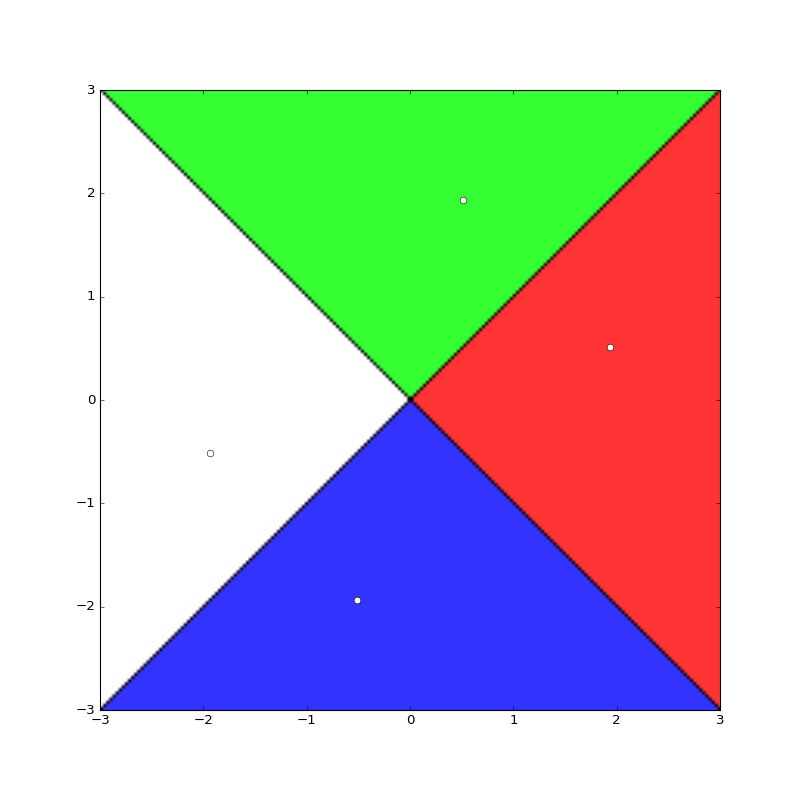

In [47]:
fig, ax = plt.subplots(figsize=(10,10))

plt.plot( [r[0] for r in solf], [r[1] for r in solf], 'wo')

implot = plt.imshow( img, extent=[-3,3, -3,3] )


* Let's repeat Newton's method, but for the (complex) equation

$$ z^3 = 1 $$

or equivalently

$$ (x+iy)^3 = x^3 - 3xy^2 + i(3x^2y - y^3) = 1 $$

i.e. 

$$x^3 - 3xy^2 = 1, \hskip 1cm 3x^2y-y^3 = 0$$


In [48]:
# do the task here life ..... keep a copy of the model t
# ask, after class commit the version created in class to 
# repo

x,y = sp.symbols("x y", real=True)
sol = sp.solve([x**3 - 3*x*y**2 - 1, 3*x**2*y-y**3 ])
sp.pprint(sol)

solf = []
for S in sol:
    print('x == ', S[x].evalf(), ' ', end='')
    print('y == ', S[y].evalf(), ' ')
    solf.append( (S[x].evalf(), S[y].evalf()) )
solf = np.array(solf)

⎡⎧            -√3 ⎫  ⎧            √3⎫              ⎤
⎢⎨x: -1/2, y: ────⎬, ⎨x: -1/2, y: ──⎬, {x: 1, y: 0}⎥
⎣⎩             2  ⎭  ⎩            2 ⎭              ⎦
x ==  -0.500000000000000  y ==  -0.866025403784439  
x ==  -0.500000000000000  y ==  0.866025403784439  
x ==  1.00000000000000  y ==  0  


In [49]:
f = sp.Matrix([x**3 - 3*x*y**2 - 1, 3*x**2*y-y**3])
sp.pprint(f)

fx = sp.diff(f, x)
fy = sp.diff(f, y)
Df = sp.Matrix([[fx[0,0], fy[0,0]], [fx[1,0], fy[1,0]]] )
sp.pprint(Df)

nit = sp.Matrix([x, y]) - (Df**(-1))*f
nit = sp.simplify(nit)
sp.pprint(nit)

⎡ 3        2    ⎤
⎢x  - 3⋅x⋅y  - 1⎥
⎢               ⎥
⎢     2      3  ⎥
⎣  3⋅x ⋅y - y   ⎦
⎡   2      2             ⎤
⎢3⋅x  - 3⋅y     -6⋅x⋅y   ⎥
⎢                        ⎥
⎢                2      2⎥
⎣   6⋅x⋅y     3⋅x  - 3⋅y ⎦
⎡   5      3  2    2        4    2⎤
⎢2⋅x  + 4⋅x ⋅y  + x  + 2⋅x⋅y  - y ⎥
⎢─────────────────────────────────⎥
⎢        ⎛ 4      2  2    4⎞      ⎥
⎢      3⋅⎝x  + 2⋅x ⋅y  + y ⎠      ⎥
⎢                                 ⎥
⎢       ⎛ 4      2  2        4⎞   ⎥
⎢   2⋅y⋅⎝x  + 2⋅x ⋅y  - x + y ⎠   ⎥
⎢   ───────────────────────────   ⎥
⎢        ⎛ 4      2  2    4⎞      ⎥
⎣      3⋅⎝x  + 2⋅x ⋅y  + y ⎠      ⎦


In [50]:
## make it a callable function
from sympy.utilities.autowrap import ufuncify
NIT = []
for i in range(2):
    NIT.append(ufuncify([x,y], nit[i,0]))

## NIT is a list of callable functions.  We would prefer it is a callable
## function that returns a pair! 
nitv = lambda x,y: np.array([NIT[0](x,y), NIT[1](x,y)])
    
df = ufuncify([x,y], Df.det())

print(df(1,2))

225.0


In [51]:
cList = [[1.0, 1.0, 1.0], [1.0, 0.2, 0.2], [0.2, 1.0, 0.2], [0.2, 0.2, 1.0], [0.0, 0.0, 0.0]]

## z0 is your initial location to try, this will be a pair
## n is the max number of iterations before we give up -- colored cList[-1] if not close to
## root.  returns a colour from cList
def newtIt( z0, n ):
    retval = cList[-1]
    for i in range(n):
        droot = []
        for i in range(solf.shape[0]):
            dif = solf[i] - z0
            droot.append( ( ma.sqrt(sum(dif*dif)), i ) )
        ## droot is a list of (distances between z0 and the ith root, i)
        droot = sorted(droot) ## sorted from shortest distance to longest
        if droot[0][0] < 0.0001:
            retval = cList[droot[0][1]] ## using the i.
            break ## removes us from the for loop
        if abs(df(*z0)) < 0.00000001:
            break ## z0 is a pair z0 = (x,y), then *z0 == x,y
        z0 = nitv(*z0)
        #print(z0)
    return retval

In [55]:
xarr = np.linspace(-3.0, 3.0, 600)
yarr = np.linspace(-3.0, 3.0, 600)

img = []
for j in tqdm.tqdm(range(yarr.shape[0])):
    y = yarr[j]
    bline = []
    for x in xarr:
        bline.append( newtIt( (x,y), 20 ))
    img.append(bline)

100%|██████████| 600/600 [1:11:55<00:00,  2.71s/it]


<IPython.core.display.Javascript object>


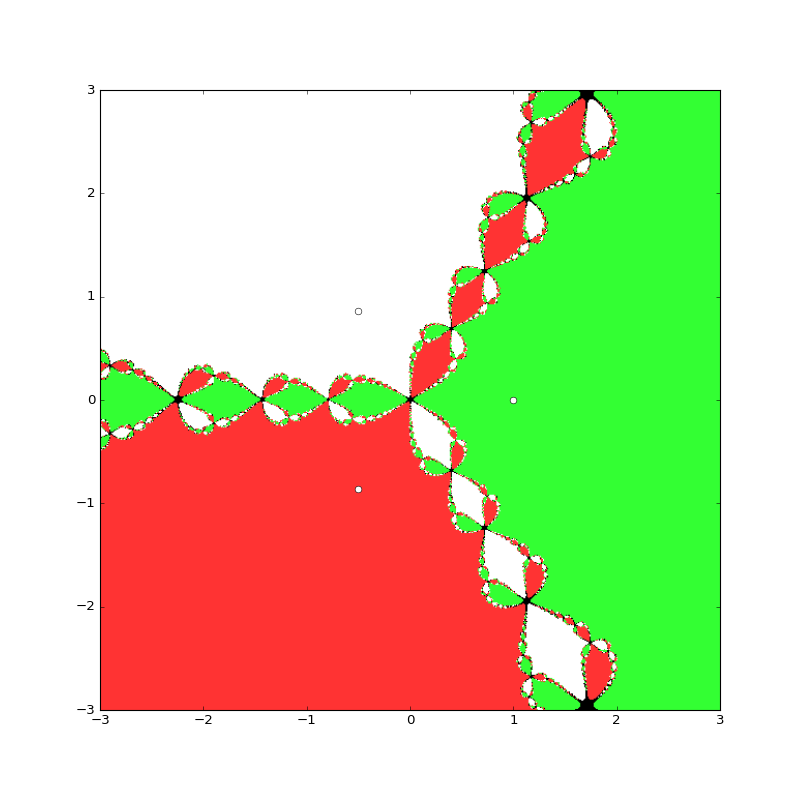

In [56]:
plt.close()

fig, ax = plt.subplots(figsize=(10,10))

plt.plot( [r[0] for r in solf], [r[1] for r in solf], 'wo')

implot = plt.imshow( img, extent=[-3,3, -3,3] )